In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [27]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [28]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [29]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [30]:
l = ['CustomerId','Surname','RowNumber']
df.drop(l, axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


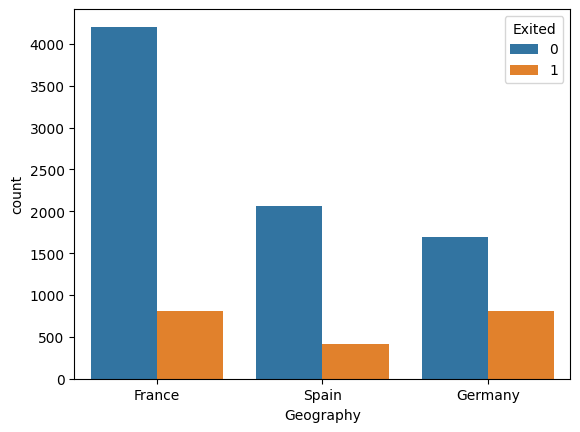

In [31]:
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

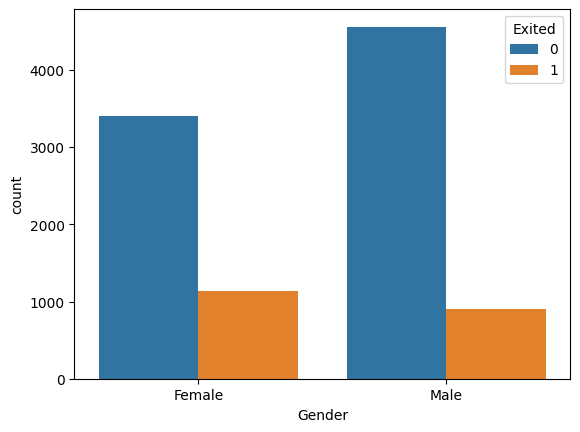

In [21]:
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()

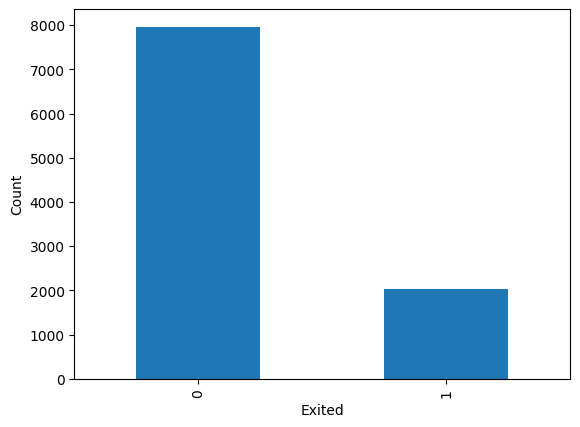

In [22]:
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

In [32]:
df['Geography'].replace(['France','Germany','Spain'],[1,2,3],inplace=True)
df['Gender'].replace(['Male','Female'],[0,1],inplace=True)

In [33]:
y = df['Exited']
x = df.drop(['Exited'],axis=1)
print(x,y)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          1       1   42       2       0.00              1   
1             608          3       1   41       1   83807.86              1   
2             502          1       1   42       8  159660.80              3   
3             699          1       1   39       1       0.00              2   
4             850          3       1   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          1       0   39       5       0.00              2   
9996          516          1       0   35      10   57369.61              1   
9997          709          1       1   36       7       0.00              1   
9998          772          2       0   42       3   75075.31              2   
9999          792          1       1   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
print(x)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          1       1   42       2       0.00              1   
1             608          3       1   41       1   83807.86              1   
2             502          1       1   42       8  159660.80              3   
3             699          1       1   39       1       0.00              2   
4             850          3       1   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          1       0   39       5       0.00              2   
9996          516          1       0   35      10   57369.61              1   
9997          709          1       1   36       7       0.00              1   
9998          772          2       0   42       3   75075.31              2   
9999          792          1       1   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [ ]:
l=[]

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=75, random_state=5)

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=75, random_state=5)

In [68]:
y_pred=rf.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)
l.append(accuracy_score(y_test,y_pred)*100)

86.2


In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred)*100)

[[1917   67]
 [ 278  238]]
78.0327868852459


In [70]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [71]:
lg.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_pred=lg.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)
l.append(accuracy_score(y_test,y_pred)*100)

80.47999999999999


In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred)*100)

[[1923   61]
 [ 427   89]]
59.333333333333336


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [75]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [76]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)
l.append(accuracy_score(y_test,y_pred)*100)

86.44


In [77]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred)*100)

[[1924   60]
 [ 279  237]]
79.7979797979798


<ipython-input-87-7cacbd4520bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(l[3:])


<Axes: ylabel='Density'>

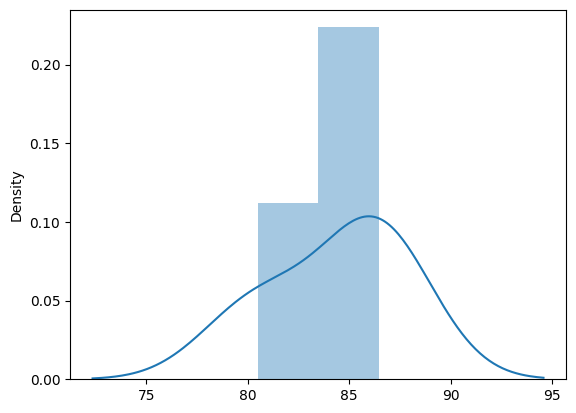

In [87]:
sns.distplot(l[3:])